2024-07-17 08:48:21.252425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 08:48:21.252549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 08:48:21.370243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10000
115/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11185287.0000

I0000 00:00:1721206114.528978     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9283851.0000 - val_loss: 1556879.7500
Epoch 2/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1524697.6250 - val_loss: 1272184.5000
Epoch 3/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1177446.1250 - val_loss: 888080.4375
Epoch 4/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 825439.5625 - val_loss: 551090.4375
Epoch 5/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 535901.0000 - val_loss: 437571.0938
Epoch 6/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 428443.0625 - val_loss: 414294.4375
Epoch 7/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 417781.1875 - val_loss: 405734.3125
Epoch 8/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395925.7188 - val_loss: 390733.9375
Epoch 9/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395066.9375 - val_loss: 375796.5312
Epoch 10/10000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 383839.7812 - val_loss: 367039.4062
Epoch 11/10000
250

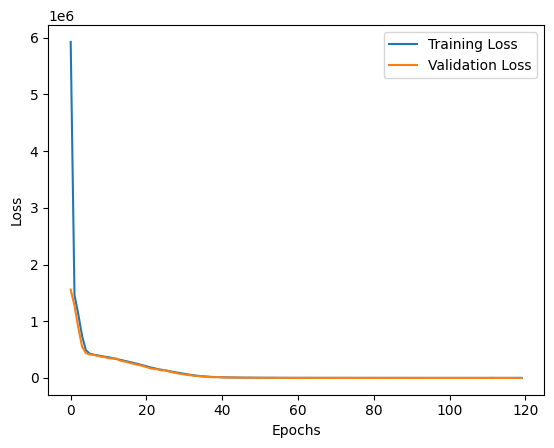

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Absolute Error: 10.621820229053498
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Test Sample: [[30 10]]
True Value: 300
Predicted Value: 294.0264892578125


In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

np.random.seed(42)
X1 = np.random.randint(1, 101, 10000)  
X2 = np.random.randint(1, 101, 10000)
X = np.column_stack((X1, X2))
y = X1 * X2  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(1)  
])


model.compile(optimizer='adam', loss='mse')

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10,  
    restore_best_weights=True  
)


new = model.fit(
    X_train, y_train, 
    epochs=10000,  
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  
    verbose=1
)

plt.plot(new.history['loss'], label='Training Loss')
plt.plot(new.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


test_sample = X_test[0].reshape(1, -1)
true_value = y_test[0]
predicted_value = model.predict(test_sample)[0][0]

print(f"Test Sample: {test_sample}")
print(f"True Value: {true_value}")
print(f"Predicted Value: {predicted_value}")